In [2]:
corpus_file_path = 'annot.opcorpora.no_ambig.xml'
slovar_file_path = 'slovar.xml'

from xml.etree import cElementTree as ET
import pandas as pd

In [2]:
cls = ['word', 'pos', 'sense_n', 'sense_def']

tree = ET.parse(slovar_file_path)

In [3]:
i = 0
slovar_data = pd.DataFrame(columns=cls)
for elem in tree.iter('entry'):
    added = False
    #ind = elem.find('index')
    if elem.find('form/orth') != None:
        form = elem.find('form/orth').text
    else:
        #print('form not found')
        continue
    if elem.find('./form/gramGrp/pos') != None:
        pos = elem.find('./form/gramGrp/pos').text
    else:
        #print('pos not found')
        pos = ' сущ. '

    #print(len(elem.findall('./sense')))
    for sense in elem.findall('./sense'):
        #print(sense)
        n = sense.get('n')
        #print(n)
        if sense.find('./def/text') != None:
            sense_def = sense.find('./def/text').text
        else:
            sense_def = ''
        #print(sense_def)
        #cit = sense.find('./cit/text').text
        #print([form, pos, n, sense_def])
        slovar_data.loc[i] = [form, pos, n, sense_def]
        added = True
        #print(i)
        i += 1
    if added == False:
        slovar_data.loc[i] = [form, pos, '-', '-']
    if i%100 == 0:
        print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2500
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
4000
4200
4300
4400
4500
4600
4600
4700
4800
4900
4900
5000
5100
5200
5300
5400
5600
5700
5800
5900
6000
6100
6200
6400
6500
6600
6700
6900
7000
7000
7000
7000
7000
7100
7200
7300
7600
7800
7900
8000
8000
8000
8000
8000
8000
8000
8100
8200
8200
8300
8400
8500
8600
8700
8800
8900
9000
9000
9100
9200
9300
9300
9400
9500
9600
9700
9800
9900
10000
10100
10300
10500
10600
10900
11100
11100
11100
11200
11300
11400
11500
11600
11700
11900
12000
12100
12200
12300
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13800
13800
13900
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
14900
15000
15100
15200
15300
15400
15600
15700
15800
15900
16000
16100
16300
16400
16500
16600
16700
16800
16800
16800
16900
17100
17200
17300
17300
17400
17500
17700
17800
17900
18000
18100
18200
183

In [4]:
slovar_data.head(20)

,word,pos,sense_n,sense_def
0,2. А,союз,1,"Иначе, в противном случае."
1,2. А,союз,2,"На самом деле, в действительности."
2,2. А,союз,3,"Потому что, так как."
3,3. А,частица,1,"Употребляется для выражения утверждения, согл..."
4,3. А,частица,2,Употребляется при выражении согласия после пе...
5,3. А,частица,3,Выражает побуждение к ответу или к действиям.
6,4. А,межд,1,"Припоминание, узнавание при встрече, догадку ..."
7,4. А,межд,2,"Удовольствие, радость, удивление при виде ког..."
8,4. А,межд,3,"Досаду, негодование, угрозу, злорадство."
9,4. А,межд,4,"Решимость с оттенком досады, отчаяния."


In [5]:
with open('slovar_data_save.csv', 'w+', encoding='utf-8') as f:
    slovar_data.to_csv(f, columns=cls)
with open('slovar_data.csv', 'w+', encoding='utf-8') as f:
    slovar_data.to_csv(f, columns=cls)

In [7]:
from string import punctuation

slovar_data = pd.read_csv('slovar_data.csv')
slovar_data = slovar_data.drop('Unnamed: 0', 1)
#slovar_data['word'] = [word.lower().strip().split() for word in slovar_data['word']]
def rotate_w(arr):
    if len(arr) > 1:
        return [arr[1], arr[0]]
    else:
        return arr
slovar_data['word'] = [''.join([w for w in word[:] if w not in punctuation]) for word in slovar_data['word'] ]
slovar_data['word'] = [rotate_w(word.lower().strip().split()) for word in slovar_data['word']]

slovar_data['letter'] = [word[0][0] for word in slovar_data['word']]

slovar_data.head()

,word,pos,sense_n,sense_def,letter
0,"[а, 2]",союз,1.0,"Иначе, в противном случае.",а
1,"[а, 2]",союз,2.0,"На самом деле, в действительности.",а
2,"[а, 2]",союз,3.0,"Потому что, так как.",а
3,"[а, 3]",частица,1.0,"Употребляется для выражения утверждения, согл...",а
4,"[а, 3]",частица,2.0,Употребляется при выражении согласия после пе...,а


In [38]:
#from string import punctuation
import re
tree = ET.parse(corpus_file_path)
word = re.compile('\w')
did = re.compile('\d')

In [105]:
from pymystem3 import Mystem
mystem = Mystem()
def lemm(st):
    #print(mystem.lemmatize(st))
    return mystem.lemmatize(st)[0]

In [106]:
import itertools
corpus_data = pd.DataFrame(columns=['oc_id', 'word', 'context', 'sense_id', 'sense'])
i = 0
#cash = {}
for sent in tree.iter('sentence'):
    context = sent.find('source').text
    for token in sent.iter('token'):
        if len(word.findall(token.get('text'))) > 0 and len(did.findall(token.get('text'))) == 0:
            oc_id = token.get('id')
            wd = token.find('./tfr/v/l').get('t')
            #print(slovar_data['word'].values)
            #v = [row for row in slovar_data.rows if row.loc[word][0]=='абажур']
            #print(v)
            #print(len([s for s in v if s == True]))
            #print(slovar_data.loc[slovar_data['word'].values == wd])
            #print([row for row in slovar_data.iterrows()])
            if wd in set(cash.keys()):
                sense_id = cash[wd][0]
                sense = cash[wd][1]
            else:
                #print(slovar_data.iloc[:,0])
                #rows = slovar_data.loc[slovar_data['word'][0][0]==wd]
                #print(rows)
                letter = slovar_data.loc[slovar_data['letter']==wd[0]]
                #print(letter)
                senses = [str(row[0])+'\t'+str(row[1].values[-2]) for row in letter.iterrows() if row[1][0][0]==wd]
                #print(senses)
                #print(list(itertools.chain.from_iterable(senses)))
                if len(senses) == 1:
                    sense_id = senses[0].split('\t')[0]
                    sense = senses[0].split('\t')[1]
                elif len(senses) == 0:
                    #print('wrd not found')
                    wd_lm = lemm(wd)
                    senses = [str(row[0])+'\t'+str(row[1].values[-2]) for row in letter.iterrows() if row[1][0][0]==wd_lm]
                    #print(wd, wd_lm, senses)
                    if len(senses) == 0:
                        #print('wrd not found final')
                        sense_id = '-'
                        sense = '-'
                    elif len(senses) == 1:
                        #print('got it')
                        sense_id = senses[0].split('\t')[0]
                        sense = senses[0].split('\t')[1]
                    else:
                        #print('got it')
                        sense_id = '-'
                        sense = '; '.join(senses)
                else:
                    sense_id = '-'
                    sense = '; '.join(senses)
                cash[wd] = (sense_id, sense)
                
            corpus_data.loc[i] = [oc_id, wd, context, sense_id, sense]
            i += 1
            #print(wd, oc_id, sense)
            if i < 100:
                if i%10 == 0:
                    print(i)
            if i%100 == 0:
                print(i)
            

10
20
30
40
50
60
70
80
90
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
1

In [107]:
with open('corpus_data_all.csv', 'w+', encoding='utf-8') as f:
    corpus_data.to_csv(f, columns=['oc_id', 'word', 'context', 'sense_id', 'sense'])

In [42]:
corpus_data

,oc_id,word,context,sense_id,sense
0,2,школа,«Школа злословия» учит прикусить язык,-,"77690\t Учебное заведение, которое осуществляе..."
1,3,злословие,«Школа злословия» учит прикусить язык,18512,"Злая оценка, осуждение; пересуды, сплетни."
2,5,учу,«Школа злословия» учит прикусить язык,-,"72904\t Передавать кому-л. какие-л. знания, на..."
3,6,прикусить,«Школа злословия» учит прикусить язык,51014,Сжать зубами.
4,7,язык,«Школа злословия» учит прикусить язык,-,79341\t Орган в полости рта в виде мышечного в...
5,8,сохранился,Сохранится ли градус дискуссии в новом сезоне?,64634,к Сохран\'иться.
6,9,ли,Сохранится ли градус дискуссии в новом сезоне?,25890,"Травянистые и древовидные растения, способные..."
7,10,градус,Сохранится ли градус дискуссии в новом сезоне?,-,"10988\t Единица измерения угла или дуги, равна..."
8,11,дискуссия,Сохранится ли градус дискуссии в новом сезоне?,12994,Свободное публичное обсуждение какого-л. спор...
9,12,в,Сохранится ли градус дискуссии в новом сезоне?,-,"4819\t на место, пространство, вместилище, сре..."


In [108]:
len(cash)

14847

In [49]:
corpus_data.groupby('word').describe().unstack()

context                                                            \
              count unique                                                top   
word                                                                            
.DOC              1      1           Выложил здесь, .DOC в архиве ZIP (128K).   
.SU               1      1                                  Юбилей домена .SU   
.ru               1      1  Большинство из них соответствуют странам, напр...   
.РФ               2      2  Подана первая заявка на регистрацию сайта в до...   
A                 3      3  • C. Carboneras 1992. Family Anatidae (Ducks, ...   
AACM              1      1  1965 год также ознаменовался созданием в Чикаг...   
AC/DC             1      1  Успех AC/DC, которая вернулась на верхушки чар...   
ALT               1      1                                         ALT Linux:   
ASUS              1      1  Партнёрами Google в деле распространения новой...   
Acer              1      1  Партнёрами Google в деле распространения новой...   
Act               1      1  Объединение Англии и Шотландии произошло в 170...   
Adobe             2      2  Партнёрами Google в деле распространения новой...   
Advancement       1      1  1965 год также ознаменовался созданием в Чикаг...   
Alan              1      1  • Di Perna, Alan (2002), Guitar World Presents...   
Alex              1      1  • Murphy Alex The Official Illustrated History...   
Allianz           1      1  Матч открытия состоится 9 июня на новом стадио...   
Amazon            2      2                          Amazon борется с пиратами   
Amnesty           1      1  Международная амнистия (Amnesty International)...   
Anatidae          1      1  • C. Carboneras 1992. Family Anatidae (Ducks, ...   
Anderson          3      3  5. Iain Anderson This is our music. — Universi...   
Android           2      2  В конце концов именно HTC была первой компание...   
Anne              1      1  Также Каролин сотрудничает с Roberto Cavalli и...   
Another           1      1                        Another piece of experience   
App               2      2      Google запустила новый проект — App Inventor.   
Apple             9      9  По оценкам экспертов, «освобождают» свои устро...   
Arena             1      1  Матч открытия состоится 9 июня на новом стадио...   
Armada            1      1  Лу Рид заключил контракт с Cartier, Groove Arm...   
Art               2      2  В творчестве Art Ensemble of Chicago проявилис...   
Associated        1      1  Associated Press cнова покажет новости на Goog...   
Association       1      1  1965 год также ознаменовался созданием в Чикаг...   
...             ...    ...                                                ...   
явка              3      3              Явка избирателей составила 67 — 68 %.   
являюсь          27     27  Даже самая малая малость , которая в реальной ...   
являющийся        1      1  Важнейшим проектом ассоциации стала основанная...   
явно              2      2  Сам же Ющенко явно пытается сохранить хорошую ...   
явный             1      1  Это помимо явных перемен в виде тут же появивш...   
ядерный           6      6  Проблема с ядерной программой Ирана будет пров...   
ядрёный           1      1             «Ядреная антоновка — к веселому году».   
язык             13     13                   Восспоминания о фестивале языков   
яйцо              1      1  Насиживание начинается с последнего яйца, сиди...   
якутия            1      1  Сергей Николаев (27.09.1961 - 20.10.2007) Серг...   
ямадаева          1      1  Попытка покушения совершена вчера вечером на к...   
ямайка            1      1                       • Петер Прендергаст (Ямайка)   
ян                1      1                                Режиссёр Ян де Бонт   
январь            9      9                     Он может состояться 19 января.   
яндекс            1      1            Facebook на главной странице «Яндекса».   
яновской          1      1  Пьеса Фернана К

8595


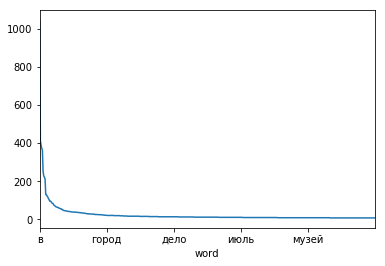

In [88]:
import numpy as np
import matplotlib.pyplot  as plt
#count, division = np.histogram(corpus_data['word'])
#corpus_data['word'].hist()
print(len(corpus_data.groupby('word').count().sort_values('oc_id', ascending=False)['oc_id']))
corpus_data.groupby('word').count().sort_values('oc_id', ascending=False)['oc_id'].iloc[0:500].plot()

plt.show()

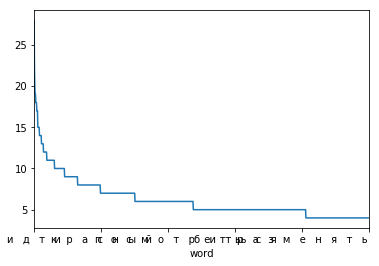

In [102]:
slovar_data['word'] = [''.join(word) for word in slovar_data['word']]
slovar_data.groupby('word').count().sort_values('pos', ascending=False)['pos'].iloc[0:1000].plot()
plt.show()